In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S3/Office_Amelie-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
len(train_data),len(test_data)

(5760, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 3s 14ms/step - loss: 1377.9532
Epoch 2/300
45/45 [==============================] - 1s 13ms/step - loss: 1273.0057
Epoch 3/300
45/45 [==============================] - 1s 13ms/step - loss: 1125.8043
Epoch 4/300
45/45 [==============================] - 1s 14ms/step - loss: 999.7112
Epoch 5/300
45/45 [==============================] - 1s 13ms/step - loss: 880.1362
Epoch 6/300
45/45 [==============================] - 1s 13ms/step - loss: 814.1566
Epoch 7/300
45/45 [==============================] - 1s 13ms/step - loss: 768.8044
Epoch 8/300
45/45 [==============================] - 1s 13ms/step - loss: 732.3789
Epoch 9/300
45/45 [==============================] - 1s 13ms/step - loss: 699.3878
Epoch 10/300
45/45 [==============================] - 1s 13ms/step - loss: 668.9942
Epoch 11/300
45/45 [==============================] - 1s 14ms/step - loss: 640.7338
Epoch 12/300
45/45 [==============================] - 1s 13ms/step - loss: 614.525

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 3.8889940573937447
Root Mean Squared Error for LSTM Model for testing is: 5.888388939010884
Mean Absolute Error for LSTM Model for training is: 2.252452037690241
Mean Absolute Error for LSTM Model for testing is: 3.120449673499184
MAPE for LSTM Model for training is: 0.09783051379886962
MAPE for LSTM Model for testing is: 0.0991745735452995


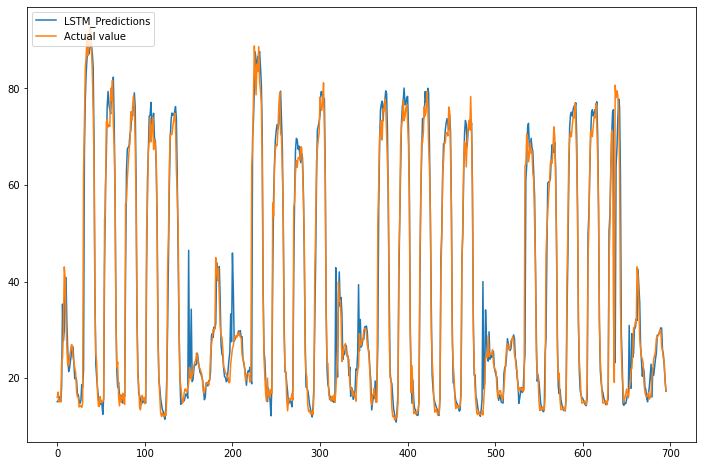

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([16.01]), array([15.127263], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.88273693]), array([1.98039566]), array([-1.09079498]), array([-0.42127552]), array([-0.04070156]), array([5.1986293]), array([-11.28912277]), array([1.88295639]), array([13.16075638]), array([0.12006363]), array([-9.10088898]), array([-5.22942825]), array([-3.09439804]), array([1.21452194]), array([2.45766327]), array([1.92474289]), array([2.11951675]), array([0.1854628]), array([-2.18747284]), array([0.13331329]), array([2.21966797]), array([0.99447052]), array([-2.34337494]), array([-0.62346588]), array([-0.54531097]), array([-1.31040596]), array([-0.41034477]), array([-1.15296272]), array([-4.73870903]), array([-3.1342691]), array([40.63953857]), array([6.58585297]), array([6.47957916]), array([3.58927826]), array([4.96558594]), array([-1.6987912]), array([1.71774323]), array([4.56872467]), array([3.70494537]), array([-0.8769873]), array([-3.49961945]), array([-9.05715424]), array([-3.63909912]), array([-2.64339478]), array([2.29621811]), array([3.09835602]), array([-1.091

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([57.47249786]), array([-40.60785675]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(393, 303)